<a href="https://colab.research.google.com/github/Kneverson/Deliverable-1/blob/main/Final_Project_Diabetes_ISM_4641.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import sklearn
import seaborn as sns

In [ ]:
# link to data https://data.world/informatics-edu/diabetes-prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Final Project/diabetes.xlsx")

In [ ]:
df.head()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Unnamed: 16,Unnamed: 17
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes,6.0,6.0
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes,NaN,NaN
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes,NaN,NaN
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes,NaN,NaN
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes,NaN,NaN


Data Cleaning


In [ ]:
# drop uneeded columns

df = df.drop(columns = {'Unnamed: 16', 'Unnamed: 17'})

# drop patient number column

df = df.drop('Patient number', axis = 1)

In [ ]:
df['Gender'].value_counts()

female    228
male      162
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Male vs. Female')

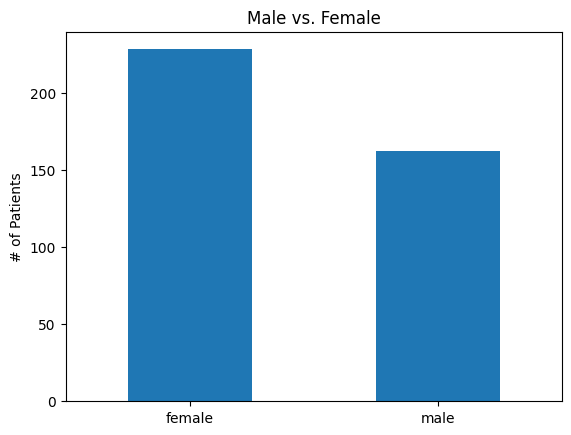

In [ ]:
# bar chart for gender
# Bar chart showing diabetes vs no diabates in dataset
df['Gender'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel("# of Patients")
plt.title("Male vs. Female")

Encoding Categorical Data

In [ ]:
# encode gender
# female = 0
# male = 1

cat_encoder = OneHotEncoder()
Gender = df[['Gender']]
genderEncoding= cat_encoder.fit_transform(Gender)

catColumns = pd.DataFrame(genderEncoding.toarray(), columns = ('Male', 'Female'))

In [ ]:
# merge
df = df.join(catColumns)

# drop old gender column
df = df.drop('Gender', axis = 1)

# we will drop female, as it will serve as a base case
df = df.drop(['Female'], axis = 1)

In [ ]:
# encode whether they have diabetes or not
# diabetes = 1, no diabetes = 0

df.loc[df['Diabetes'] == "No diabetes", "Diabetes"] = 0

df.loc[df['Diabetes'] == "Diabetes", "Diabetes"] = 1

Data Visuals

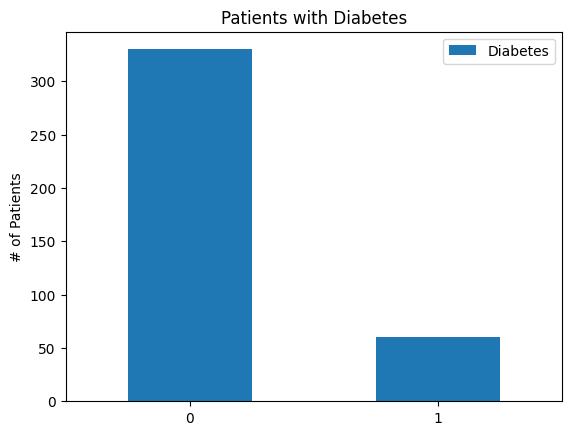

In [ ]:
# Bar chart showing diabetes vs no diabates in dataset
df['Diabetes'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel("# of Patients")
plt.title("Patients with Diabetes")
plt.legend()

([<matplotlib.patches.Wedge at 0x78109c2360b0>,
 [Text(-0.9740016429451693, 0.5111954611888794, 'No Diabetes'),
  Text(0.9740016668759548, -0.5111954155925714, 'Diabetes')],
 [Text(-0.5312736234246378, 0.2788338879212069, '85%'),
  Text(0.5312736364777935, -0.27883386305049346, '15%')])

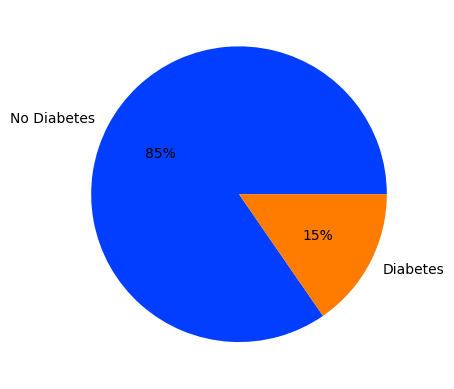

In [ ]:
# pie chart showing amount of people with diabetes
keys = ['No Diabetes', 'Diabetes']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

plt.pie(df["Diabetes"].value_counts(), labels = keys, colors = palette_color,autopct='%.0f%%')

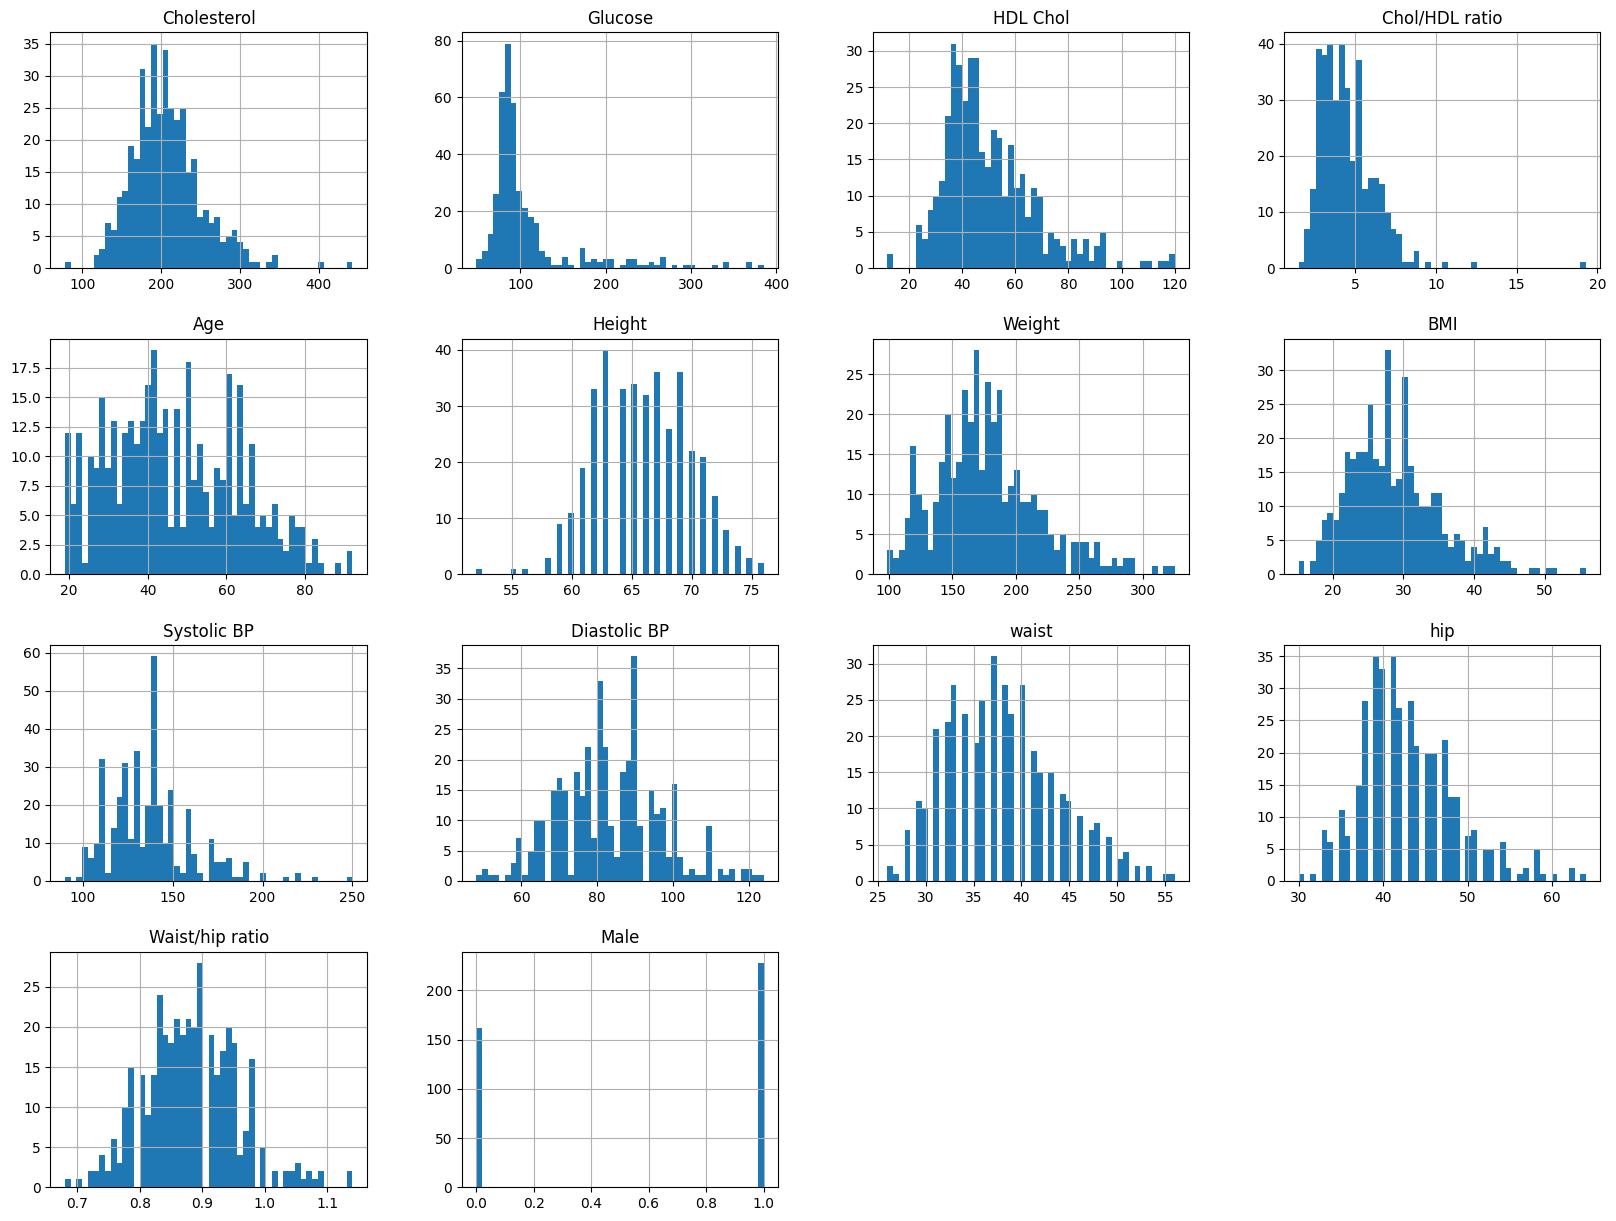

In [ ]:
# we can see that most of the variables are normally distributed with the excpetion of glucose
df.hist(bins = 50, figsize=(20,15))
plt.show()

In [ ]:
# average glucose for someone with diabetes
variable = df[df['Diabetes'] == 1]
variable['Glucose'].mean()

194.16666666666666

In [ ]:
# look at correlations

corr_matrix = df.corr(numeric_only= False)
corr_matrix

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Male
Cholesterol,1.000000,0.158102,0.193162,0.475927,0.247333,-0.063601,0.062359,0.091695,0.207741,0.166241,0.134038,0.093364,0.091847,0.204262,0.030139
Glucose,0.158102,1.000000,-0.158302,0.282210,0.294392,0.098052,0.190358,0.129286,0.162777,0.020262,0.222336,0.138223,0.185117,0.689080,-0.093372
HDL Chol,0.193162,-0.158302,1.000000,-0.681867,0.028210,-0.087238,-0.291883,-0.241860,0.031807,0.078342,-0.276697,-0.223837,-0.158777,-0.123133,0.108305
Chol/HDL ratio,0.475927,0.282210,-0.681867,1.000000,0.163201,0.081162,0.278812,0.228407,0.115505,0.038242,0.313262,0.208902,0.243329,0.272987,-0.102938
Age,0.247333,0.294392,0.028210,0.163201,1.000000,-0.082229,-0.056784,-0.009164,0.453417,0.068649,0.150585,0.004675,0.275188,0.301995,-0.084177
Height,-0.063601,0.098052,-0.087238,0.081162,-0.082229,1.000000,0.255389,-0.259589,-0.040704,0.043617,0.057447,-0.095906,0.252548,0.023466,-0.677876
Weight,0.062359,0.190358,-0.291883,0.278812,-0.056784,0.255389,1.000000,0.860147,0.097497,0.166477,0.847766,0.826985,0.250461,0.162987,-0.092053
BMI,0.091695,0.129286,-0.241860,0.228407,-0.009164,-0.259589,0.860147,1.000000,0.121408,0.145304,0.810701,0.881728,0.100873,0.145274,0.254189
Systolic BP,0.207741,0.162777,0.031807,0.115505,0.453417,-0.040704,0.097497,0.121408,1.000000,0.603662,0.210934,0.155321,0.137871,0.198600,-0.035417
Diastolic BP,0.166241,0.020262,0.078342,0.038242,0.068649,0.043617,0.166477,0.145304,0.603662,1.000000,0.165846,0.143898,0.077918,0.049351,-0.071043


In [ ]:
corr_matrix["Diabetes"].sort_values(ascending=False)

Diabetes           1.000000
Glucose            0.689080
Age                0.301995
Chol/HDL ratio     0.272987
waist              0.223378
Cholesterol        0.204262
Systolic BP        0.198600
Waist/hip ratio    0.175623
Weight             0.162987
BMI                0.145274
hip                0.143792
Diastolic BP       0.049351
Height             0.023466
Male              -0.015531
HDL Chol          -0.123133
Name: Diabetes, dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cholesterol,390.0,207.230769,44.666005,78.00,179.00,203.00,229.000,443.00
Glucose,390.0,107.338462,53.798188,48.00,81.00,90.00,107.750,385.00
HDL Chol,390.0,50.266667,17.279069,12.00,38.00,46.00,59.000,120.00
Chol/HDL ratio,390.0,4.524615,1.736634,1.50,3.20,4.20,5.400,19.30
Age,390.0,46.774359,16.435911,19.00,34.00,44.50,60.000,92.00
Height,390.0,65.951282,3.918867,52.00,63.00,66.00,69.000,76.00
Weight,390.0,177.407692,40.407824,99.00,150.25,173.00,200.000,325.00
BMI,390.0,28.775641,6.600915,15.20,24.10,27.80,32.275,55.80
Systolic BP,390.0,137.133333,22.859528,90.00,122.00,136.00,148.000,250.00
Diastolic BP,390.0,83.289744,13.498192,48.00,75.00,82.00,90.000,124.00


In [ ]:
# test and training split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
diabetes_train_X = train_set.drop("Diabetes", axis=1) # drop labels for training set
diabetes_train_y = train_set["Diabetes"].copy()

# was an object so converted to int type for ML algorithm
diabetes_train_y = diabetes_train_y.astype('int')

In [ ]:
diabetes_test_X = test_set.drop("Diabetes", axis=1) # drop labels for testing set
diabetes_test_y = test_set["Diabetes"].copy()

# was an object so converted to int type for ML algorithm
diabetes_test_y= diabetes_test_y.astype('int')

In [ ]:
# Train linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(diabetes_train_X, diabetes_train_y)

LinearRegression()

In [ ]:
# In-sample evaluation - Regression Model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# generate predictions of whether the person will have diabetes or no

prediction = lin_reg.predict(diabetes_train_X)

In [ ]:
# if greater than 1/2, then 1, else 0
prediction = prediction.round()

In [ ]:
#evaluate in-sample predictions
mean_absolute_error(diabetes_train_y, prediction)

0.06593406593406594

In [ ]:
# Out of sample evaluation (unseen data)
predictionOut = lin_reg.predict(diabetes_test_X)

predictionOut = predictionOut.round()

In [ ]:
#evaluate out-of-sample predictions
mean_absolute_error(diabetes_test_y, predictionOut)

0.13675213675213677

In [ ]:
# r2 of in sample
sklearn.metrics.r2_score(diabetes_train_y, prediction)

0.42405063291139233

In [ ]:
# r2 of out of sample
sklearn.metrics.r2_score(diabetes_test_y, predictionOut)

0.1612903225806448

Logistic Regression

In sample and out of sample predictions

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(diabetes_train_X, diabetes_train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# In-sample evaluation - Regression Model
predictions_log_train = logistic_reg.predict(diabetes_train_X)
mean_absolute_error(diabetes_train_y, predictions_log_train)

0.06227106227106227

In [ ]:
# Out of sample evaluation
predictions_log_test = logistic_reg.predict(diabetes_test_X)
mean_absolute_error(diabetes_test_y, predictions_log_test)

0.1111111111111111

Confusion Matrix

This visualizes how well the model did, we can see where it predicted it right, and where it predicted it wrong

In [ ]:
#confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sklearn.metrics.confusion_matrix(diabetes_train_y, predictions_log_train)

array([[234,   3],
       [ 14,  22]])

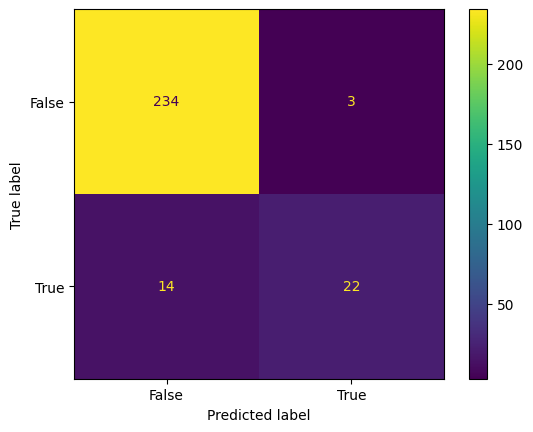

In [ ]:
#display the confusion matrix in a nicer way

# in sample
confusion_matrix = metrics.confusion_matrix(diabetes_train_y, predictions_log_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

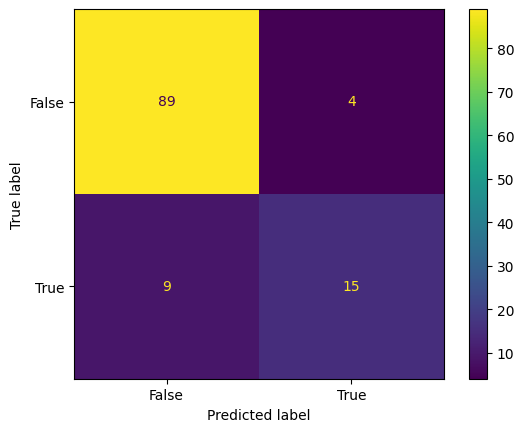

In [ ]:
# out of sample
confusion_matrix = metrics.confusion_matrix(diabetes_test_y, predictions_log_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# Cross Tabulation
# Variable relationship plot

Here we can see histograms of some of the most correlated features and how they relate to one having diabetes

<Axes: xlabel='Glucose', ylabel='Count'>

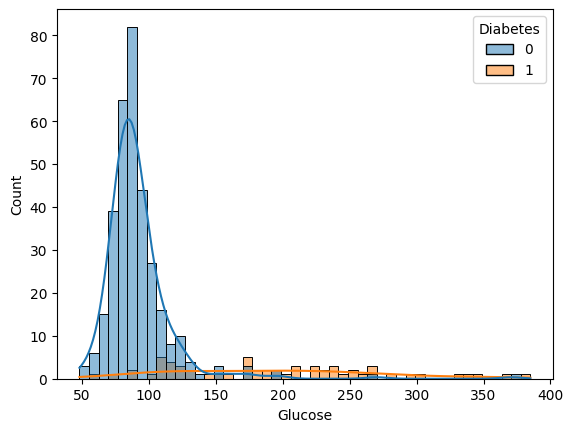

In [ ]:
sns.histplot(data=df, x = "Glucose", hue = "Diabetes", kde=True)

<Axes: xlabel='Age', ylabel='Count'>

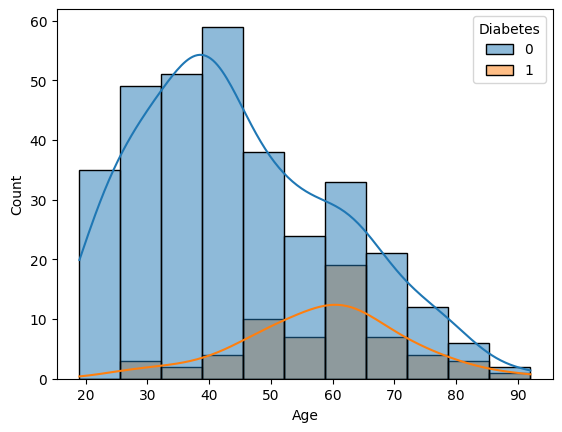

In [ ]:
sns.histplot(data=df, x = "Age", hue = "Diabetes", kde=True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

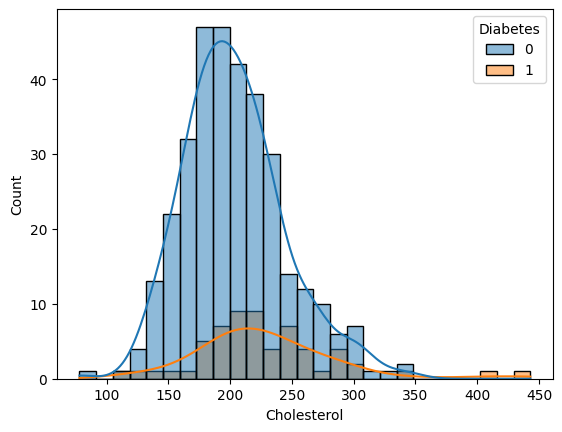

In [ ]:
sns.histplot(data=df, x = "Cholesterol", hue = "Diabetes", kde=True)

<Axes: xlabel='BMI', ylabel='Count'>

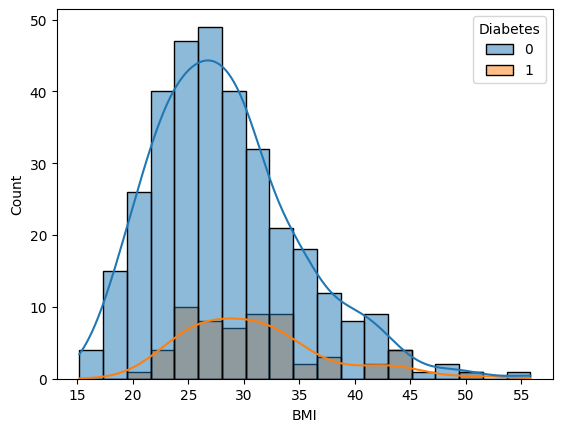

In [ ]:
sns.histplot(data=df, x = "BMI", hue = "Diabetes", kde=True)

These visuals show the relationship between two variables and whether or not that observation has diabetes or not

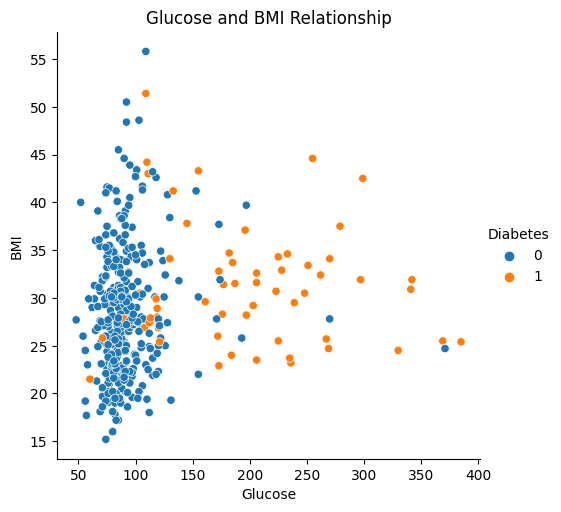

In [ ]:
sns.relplot(data=df, x="Glucose", y="BMI", hue="Diabetes").set(title = "Glucose and BMI Relationship")